### Import libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.model_selection import GridSearchCV


### Load data

In [20]:
df = pd.read_csv('../data/processed/data_clean.csv')
df

,Unnamed: 0,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_name,league_name,...,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,wage_eur,value_eur
0,0,L. Messi,RW,93,93,33,170,72,FC Barcelona,Spain Primera Division,...,96,35,24,6,11,15,14,8,560000,67500000
1,1,Cristiano Ronaldo,ST,92,92,35,187,83,Juventus,Italian Serie A,...,95,32,24,7,11,15,14,11,220000,46000000
2,2,J. Oblak,GK,91,93,27,188,87,Atlético Madrid,Spain Primera Division,...,68,12,18,87,92,78,90,90,125000,75000000
3,3,R. Lewandowski,ST,91,91,31,184,80,FC Bayern München,German 1. Bundesliga,...,88,42,19,15,6,12,8,10,240000,80000000
4,4,Neymar Jr,LW,91,91,28,175,68,Paris Saint-Germain,French Ligue 1,...,93,30,29,9,9,15,15,11,270000,90000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,4898,T. Elyounoussi,ST,70,70,32,172,66,Shonan Bellmare,Japanese J. League Division 1,...,72,33,28,15,8,9,14,7,3000,1400000
4899,4899,M. Fraga,GK,70,70,32,184,83,Mazatlán FC,Mexican Liga MX,...,51,15,15,70,70,74,69,69,6000,1100000
4900,4900,R. Shawcross,CB,70,70,32,191,76,Stoke City,English League Championship,...,64,68,72,10,12,7,13,15,15000,1100000
4901,4901,J. Moulin,GK,70,70,34,185,88,AS Saint-Étienne,French Ligue 1,...,59,13,14,72,70,65,68,71,12000,775000


In [21]:
# loại bỏ một số feature thừa trong bộ dữ liệu
df = df.drop(['Unnamed: 0', 'team_position', 'movement_acceleration', 
   'movement_sprint_speed',        
   'movement_agility',            
   'movement_reactions',          
   'movement_balance', 'mentality_aggression',        
   'mentality_interceptions',      
   'mentality_positioning',      
  'mentality_vision',            
 'mentality_penalties',         
'mentality_composure', 'league_rank'     ], axis=1)

In [22]:
df

,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_name,league_name,nationality,...,power_long_shots,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,wage_eur,value_eur
0,L. Messi,RW,93,93,33,170,72,FC Barcelona,Spain Primera Division,Argentina,...,94,35,24,6,11,15,14,8,560000,67500000
1,Cristiano Ronaldo,ST,92,92,35,187,83,Juventus,Italian Serie A,Portugal,...,93,32,24,7,11,15,14,11,220000,46000000
2,J. Oblak,GK,91,93,27,188,87,Atlético Madrid,Spain Primera Division,Slovenia,...,12,12,18,87,92,78,90,90,125000,75000000
3,R. Lewandowski,ST,91,91,31,184,80,FC Bayern München,German 1. Bundesliga,Poland,...,85,42,19,15,6,12,8,10,240000,80000000
4,Neymar Jr,LW,91,91,28,175,68,Paris Saint-Germain,French Ligue 1,Brazil,...,84,30,29,9,9,15,15,11,270000,90000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,T. Elyounoussi,ST,70,70,32,172,66,Shonan Bellmare,Japanese J. League Division 1,Norway,...,66,33,28,15,8,9,14,7,3000,1400000
4899,M. Fraga,GK,70,70,32,184,83,Mazatlán FC,Mexican Liga MX,Mexico,...,10,15,15,70,70,74,69,69,6000,1100000
4900,R. Shawcross,CB,70,70,32,191,76,Stoke City,English League Championship,England,...,28,68,72,10,12,7,13,15,15000,1100000
4901,J. Moulin,GK,70,70,34,185,88,AS Saint-Étienne,French Ligue 1,France,...,14,13,14,72,70,65,68,71,12000,775000


In [23]:
# mã hóa một số feature
player_positions_encoder = LabelEncoder()
preferred_foot_endcoder = LabelEncoder()
df['player_positions'] = player_positions_encoder.fit_transform(df['player_positions'])
df['preferred_foot'] = preferred_foot_endcoder.fit_transform(df['preferred_foot'])

In [24]:
# loại bỏ một số cột thông tin dạng Object
object_columns = df.select_dtypes(include=['object'])
df = df.select_dtypes(exclude=['object'])

In [25]:
# chuẩn hóa dữ liệu ở 2 cột lương và giá trị của cầu thủ
df['wage_eur'] = df['wage_eur'] / 1000
df['value_eur'] = df['value_eur'] / 1000000

In [26]:
df

,player_positions,overall,potential,age,height_cm,weight_kg,preferred_foot,pace,shooting,passing,...,power_long_shots,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,wage_eur,value_eur
0,12,93,93,33,170,72,0,85.000000,92.000000,91.000000,...,94,35,24,6,11,15,14,8,560.0,67.500
1,14,92,92,35,187,83,1,89.000000,93.000000,81.000000,...,93,32,24,7,11,15,14,11,220.0,46.000
2,5,91,93,27,188,87,1,60.453968,50.917914,56.270748,...,12,12,18,87,92,78,90,90,125.0,75.000
3,14,91,91,31,184,80,1,78.000000,91.000000,78.000000,...,85,42,19,15,6,12,8,10,240.0,80.000
4,8,91,91,28,175,68,1,91.000000,85.000000,86.000000,...,84,30,29,9,9,15,15,11,270.0,90.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,14,70,70,32,172,66,1,77.000000,69.000000,66.000000,...,66,33,28,15,8,9,14,7,3.0,1.400
4899,5,70,70,32,184,83,1,60.453968,50.917914,56.270748,...,10,15,15,70,70,74,69,69,6.0,1.100
4900,1,70,70,32,191,76,1,40.000000,37.000000,46.000000,...,28,68,72,10,12,7,13,15,15.0,1.100
4901,5,70,70,34,185,88,1,60.453968,50.917914,56.270748,...,14,13,14,72,70,65,68,71,12.0,0.775


In [27]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(x)
print(y)

      player_positions  overall  potential  age  height_cm  weight_kg  \
0                   12       93         93   33        170         72   
1                   14       92         92   35        187         83   
2                    5       91         93   27        188         87   
3                   14       91         91   31        184         80   
4                    8       91         91   28        175         68   
...                ...      ...        ...  ...        ...        ...   
4898                14       70         70   32        172         66   
4899                 5       70         70   32        184         83   
4900                 1       70         70   32        191         76   
4901                 5       70         70   34        185         88   
4902                 0       70         70   31        180         74   

      preferred_foot       pace   shooting    passing  ...  power_strength  \
0                  0  85.000000  92.000000  9

### Train test split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)    

(3922, 36)
(3922,)


### Selection Model: XGBoost

In [29]:
# Huấn luyện mô hình
model = XGBRegressor(eta=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    gamma=0.1,
    n_estimators=300,
    reg_lambda=5,
    reg_alpha=1,
    objective='reg:squarederror',
    random_state=42)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.05, eval_metric=None,
             feature_types=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [30]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.0793914871409425
R-squared: 0.9860381676262233


In [31]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Thiết lập scorers cho MSE và R²
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Đánh giá bằng Cross-Validation cho MSE
cv_mse_results = cross_val_score(model, x, y, cv=kfold, scoring=mse_scorer)
cv_mse = -cv_mse_results  # Chuyển đổi giá trị âm trở lại giá trị dương
cv_rmse = np.sqrt(cv_mse)
# Đánh giá bằng Cross-Validation cho R²
cv_r2_results = cross_val_score(model, x, y, cv=kfold, scoring='r2')

# In ra các kết quả
print(f'MSE from CV: {cv_mse}')
print(f'RMSE from CV: {cv_rmse}')
print(f'Mean RMSE from CV: {np.mean(cv_rmse)}')
print(f'Standard Deviation of RMSE from CV: {np.std(cv_rmse)}')
print(f'R-squared from CV: {cv_r2_results}')
print(f'Mean R-squared from CV: {np.mean(cv_r2_results)}')
print(f'Standard Deviation of R-squared from CV: {np.std(cv_r2_results)}')

MSE from CV: [1.02262716 1.5246541  0.45531815 1.35426048 1.35647299]
RMSE from CV: [1.01125029 1.23476884 0.67477266 1.16372698 1.1646772 ]
Mean RMSE from CV: 1.0498391969192906
Standard Deviation of RMSE from CV: 0.2012566400756227
R-squared from CV: [0.98677241 0.97480768 0.99169479 0.98219072 0.98152909]
Mean R-squared from CV: 0.9833989388964051
Standard Deviation of R-squared from CV: 0.0056385682969637314


In [32]:

# Định nghĩa các hyperparameter và giá trị tương ứng
param_grid = {
    'eta': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'subsample': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.8, 1.0]
}

# Sử dụng GridSearchCV để tìm kiếm hyperparameter tối ưu
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Lấy hyperparameter tốt nhất
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters: {'colsample_bytree': 1.0, 'eta': 0.01, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}


In [33]:
# Huấn luyện mô hình với hyperparameter tối ưu
xgb_optimized = XGBRegressor(**best_params)
xgb_optimized.fit(x_train, y_train)

# Đánh giá lại mô hình
y_pred_optimized = xgb_optimized.predict(x_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f'Optimized Mean Squared Error: {mse_optimized}')
print(f'Optimized R-squared: {r2_optimized}')

Optimized Mean Squared Error: 1.0808058145946522
Optimized R-squared: 0.9860198734270699


In [34]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Thiết lập scorers cho MSE và R²
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Đánh giá bằng Cross-Validation cho MSE
cv_mse_results = cross_val_score(xgb_optimized, x, y, cv=kfold, scoring=mse_scorer)
cv_mse = -cv_mse_results  # Chuyển đổi giá trị âm trở lại giá trị dương
cv_rmse = np.sqrt(cv_mse)
# Đánh giá bằng Cross-Validation cho R²
cv_r2_results = cross_val_score(xgb_optimized, x, y, cv=kfold, scoring='r2')

# In ra các kết quả
print(f'MSE from CV: {cv_mse}')
print(f'RMSE from CV: {cv_rmse}')
print(f'Mean RMSE from CV: {np.mean(cv_rmse)}')
print(f'Standard Deviation of RMSE from CV: {np.std(cv_rmse)}')
print(f'R-squared from CV: {cv_r2_results}')
print(f'Mean R-squared from CV: {np.mean(cv_r2_results)}')
print(f'Standard Deviation of R-squared from CV: {np.std(cv_r2_results)}')

MSE from CV: [0.73799443 1.12716682 0.45129047 2.25715027 0.8813053 ]
RMSE from CV: [0.85906602 1.06168113 0.67178156 1.50238153 0.93877862]
Mean RMSE from CV: 1.006737773832514
Standard Deviation of RMSE from CV: 0.2783172879513556
R-squared from CV: [0.99045411 0.98137548 0.99176825 0.97031722 0.98799939]
Mean R-squared from CV: 0.9843828907817185
Standard Deviation of R-squared from CV: 0.007891386126785083


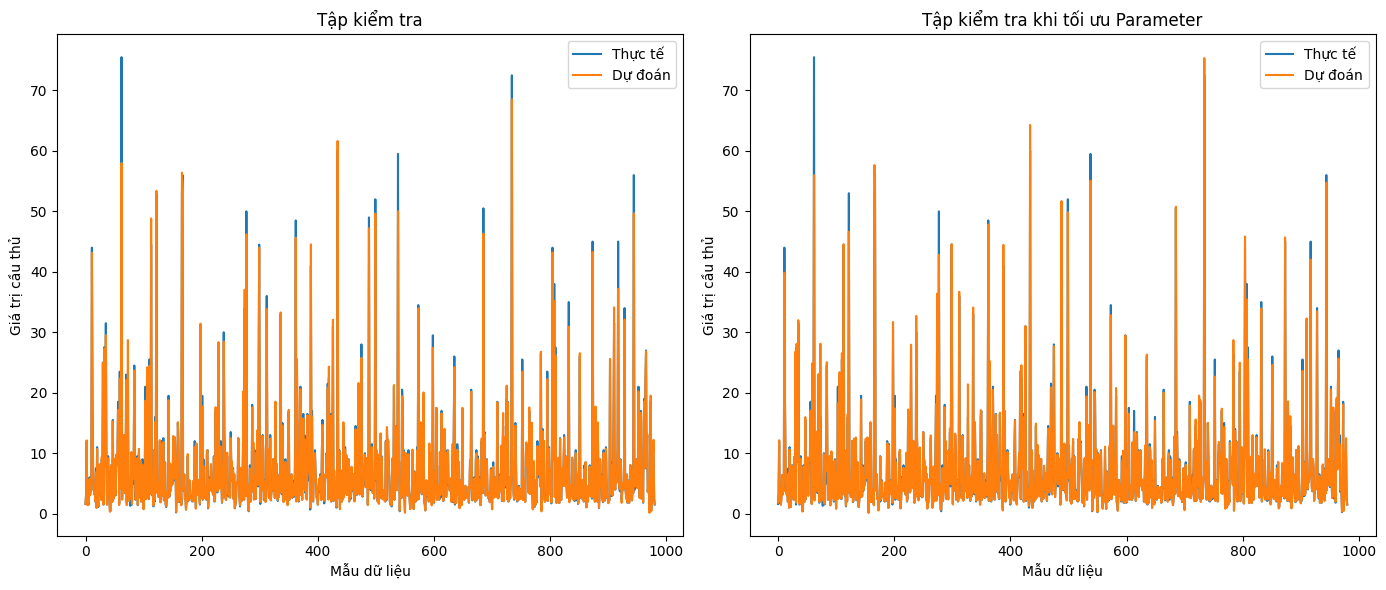

In [37]:

# Vẽ đồ thị cho tập huấn luyện
plt.figure(figsize=(14, 6))

# Đồ thị cho tập huấn luyện
plt.subplot(1, 2, 1)
plt.plot(range(len(y_test)), y_test.values, label='Thực tế')
plt.plot(range(len(y_test)), y_pred, label='Dự đoán')
plt.title('Tập kiểm tra')
plt.xlabel('Mẫu dữ liệu')  # Trục x: số thứ tự của mẫu
plt.ylabel('Giá trị cầu thủ')  # Trục y: giá trị cầu thủ
plt.legend()

# Đồ thị cho tập kiểm tra
plt.subplot(1, 2, 2)
plt.plot(range(len(y_test)), y_test.values, label='Thực tế')
plt.plot(range(len(y_test)), y_pred_optimized, label='Dự đoán')
plt.title('Tập kiểm tra khi tối ưu Parameter')
plt.xlabel('Mẫu dữ liệu')  # Trục x: số thứ tự của mẫu
plt.ylabel('Giá trị cầu thủ')  # Trục y: giá trị cầu thủ
plt.legend()

plt.tight_layout()
plt.show()
